# 1. Reviews Verzamelen

## Beautiful Soup en Requests klaarzetten

In [1]:
# instal
!pip install requests beautifulsoup4


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# importeren
import requests
from bs4 import BeautifulSoup
import re

In [2]:
# Request naar Yelp om de raw HTML document te krijgen
r = requests.get('https://www.yelp.com/biz/mcdonalds-los-angeles-106')

In [3]:
# Status check
r.status_code

200

In [4]:
# Bekijk response
r.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>\n            window.yelp = window.yelp || {};\

## Convert Text naar Soup

In [5]:
# Convert van HTML naar Soup
soup = BeautifulSoup(r.text, 'html.parser')

In [6]:
# Pak alle reviews waar de tag span is
# Waar lang = en en de class bevat raw__
regex = re.compile('raw__')
results = soup.find_all('span', {'lang':'en'}, class_=regex)

In [7]:
# Check
results[0].text

"Just an average McDonald's Nothing particularly special. Love a late night burger though"

In [8]:
# Loop door results om om te zetten naar text
reviews = [review.text for review in results]

In [9]:
# Check 
reviews

["Just an average McDonald's Nothing particularly special. Love a late night burger though",
 'Nice floor and sitting area, clean store, food ok. Nice staffs. Much better than many other MDs',
 "Ordered from a fast food burger place that left out my burgers. 'Nuff said. Cheeseburger",
 "Very clean and organized. I like it made me feel comfortable. The staff are very nice and polite do there job very well. The staff are fast and know how to keep the line short. You order in one side and pick up in the other side. They have seating available. In the first floor you can sit or go up the stairs to more seating and the bathrooms. Didn't go in the bathroom's but I know they have bathrooms. This is one of the best McDonald's I ever been into. I will be coming back here.",
 'Lastima que no hay estrella cero , los empleados deberian a estar más entrenados , siempre me toca con la cajera del Drive con mala actitud y falta de respeto a los clientes , piensa que van a pedir las cosas de gratis , y

## Scraping van Meerder Pagina's

In [10]:
# Patroon van pagina's herkennen
[
'https://www.yelp.com/biz/mcdonalds-los-angeles-106', 
'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10' # pagina 2
'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60' # pagina 7
'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120' # pagina 13 
]

['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120']

In [11]:
# Links van de verschillende pagina's aanmaken
links = [f'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start={10+x*10}' for x in range(12)]
links.insert(0, 'https://www.yelp.com/biz/mcdonalds-los-angeles-106')

In [12]:
# Check
links

['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=20',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=30',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=40',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=50',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=70',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=80',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=90',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=100',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=110',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120']

In [13]:
reviews = []
for link in links:
    r = requests.get(link)
    soup = BeautifulSoup(r.text, 'html.parser')
    results = soup.find_all('span', {'lang':'en'}, class_=regex)
    reviews = [*reviews, *[result.text for result in results]]
reviews    

["Just an average McDonald's Nothing particularly special. Love a late night burger though",
 'Nice floor and sitting area, clean store, food ok. Nice staffs. Much better than many other MDs',
 "Ordered from a fast food burger place that left out my burgers. 'Nuff said. Cheeseburger",
 "Very clean and organized. I like it made me feel comfortable. The staff are very nice and polite do there job very well. The staff are fast and know how to keep the line short. You order in one side and pick up in the other side. They have seating available. In the first floor you can sit or go up the stairs to more seating and the bathrooms. Didn't go in the bathroom's but I know they have bathrooms. This is one of the best McDonald's I ever been into. I will be coming back here.",
 'Lastima que no hay estrella cero , los empleados deberian a estar más entrenados , siempre me toca con la cajera del Drive con mala actitud y falta de respeto a los clientes , piensa que van a pedir las cosas de gratis , y

In [14]:
# Check lengte
len(reviews)

125

# 2. Analyseer de Reviews

## Bereken Text Metrics

In [15]:
# Importeren
import pandas as pd
import numpy as np

In [16]:
# reviews naar data frame
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [17]:
# check
df.head()

,review
0,Just an average McDonald's Nothing particularl...
1,"Nice floor and sitting area, clean store, food..."
2,Ordered from a fast food burger place that lef...
3,Very clean and organized. I like it made me fe...
4,"Lastima que no hay estrella cero , los emplead..."


In [18]:
# Worden aantal tellen en aantal characters
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['review'].str.len()

In [19]:
# Check
df.head()

,review,word_count,char_count
0,Just an average McDonald's Nothing particularl...,13,88
1,"Nice floor and sitting area, clean store, food...",17,95
2,Ordered from a fast food burger place that lef...,15,88
3,Very clean and organized. I like it made me fe...,97,485
4,"Lastima que no hay estrella cero , los emplead...",84,412


## Stopwords tellen

In [20]:
# installeren
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# stopwoorden downloaden
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
stopwords.words('dutch')

['de',
 'en',
 'van',
 'ik',
 'te',
 'dat',
 'die',
 'in',
 'een',
 'hij',
 'het',
 'niet',
 'zijn',
 'is',
 'was',
 'op',
 'aan',
 'met',
 'als',
 'voor',
 'had',
 'er',
 'maar',
 'om',
 'hem',
 'dan',
 'zou',
 'of',
 'wat',
 'mijn',
 'men',
 'dit',
 'zo',
 'door',
 'over',
 'ze',
 'zich',
 'bij',
 'ook',
 'tot',
 'je',
 'mij',
 'uit',
 'der',
 'daar',
 'haar',
 'naar',
 'heb',
 'hoe',
 'heeft',
 'hebben',
 'deze',
 'u',
 'want',
 'nog',
 'zal',
 'me',
 'zij',
 'nu',
 'ge',
 'geen',
 'omdat',
 'iets',
 'worden',
 'toch',
 'al',
 'waren',
 'veel',
 'meer',
 'doen',
 'toen',
 'moet',
 'ben',
 'zonder',
 'kan',
 'hun',
 'dus',
 'alles',
 'onder',
 'ja',
 'eens',
 'hier',
 'wie',
 'werd',
 'altijd',
 'doch',
 'wordt',
 'wezen',
 'kunnen',
 'ons',
 'zelf',
 'tegen',
 'na',
 'reeds',
 'wil',
 'kon',
 'niets',
 'uw',
 'iemand',
 'geweest',
 'andere']

In [24]:
stop_words = stopwords.words('english')

In [25]:
# tellen van stopwoorden
df['stopword_count'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [26]:
# check 
df.head()

,review,word_count,char_count,stopword_count
0,Just an average McDonald's Nothing particularl...,13,88,2
1,"Nice floor and sitting area, clean store, food...",17,95,3
2,Ordered from a fast food burger place that lef...,15,88,5
3,Very clean and organized. I like it made me fe...,97,485,42
4,"Lastima que no hay estrella cero , los emplead...",84,412,11


# 3. Cleaning de Dataset

## Lowercasing alle woorden

In [27]:
# Lowercasing
df['review_lower'] = df['review'].apply(lambda x: " ".join(x. lower() for x in x.split()))

In [28]:
# Check
df.head()

,review,word_count,char_count,stopword_count,review_lower
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food..."
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead..."


## Weg met Punctuation

In [31]:
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]','')

C:\Users\stefa\AppData\Local\Temp\ipykernel_8788\760639540.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]','')


In [32]:
# Check
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead...",lastima que no hay estrella cero los empleado...


## Verwijder Stopwords

In [33]:
# verwijder stopwords
df['review_nostop'] = df['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [34]:
# check 
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...,average mcdonalds nothing particularly special...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...,nice floor sitting area clean store food ok ni...
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...,ordered fast food burger place left burgers nu...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...,clean organized like made feel comfortable sta...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead...",lastima que no hay estrella cero los empleado...,lastima que hay estrella cero los empleados de...


## Visualiseer Veel Voorkomende Woorden

In [35]:
# importeren 
import seaborn as sns
from matplotlib import pyplot as plt

In [54]:
# aanmaken van frequentie df
freq = pd.Series(" ".join(df['review_nostop']).split()).value_counts().reset_index()[:60]

In [55]:
# Check
freq.columns = ['words', 'frequencies']
freq

,words,frequencies
0,mcdonalds,77
1,order,58
2,food,47
3,drive,40
4,service,36
5,like,35
6,dont,35
7,one,34
8,get,32
9,always,28


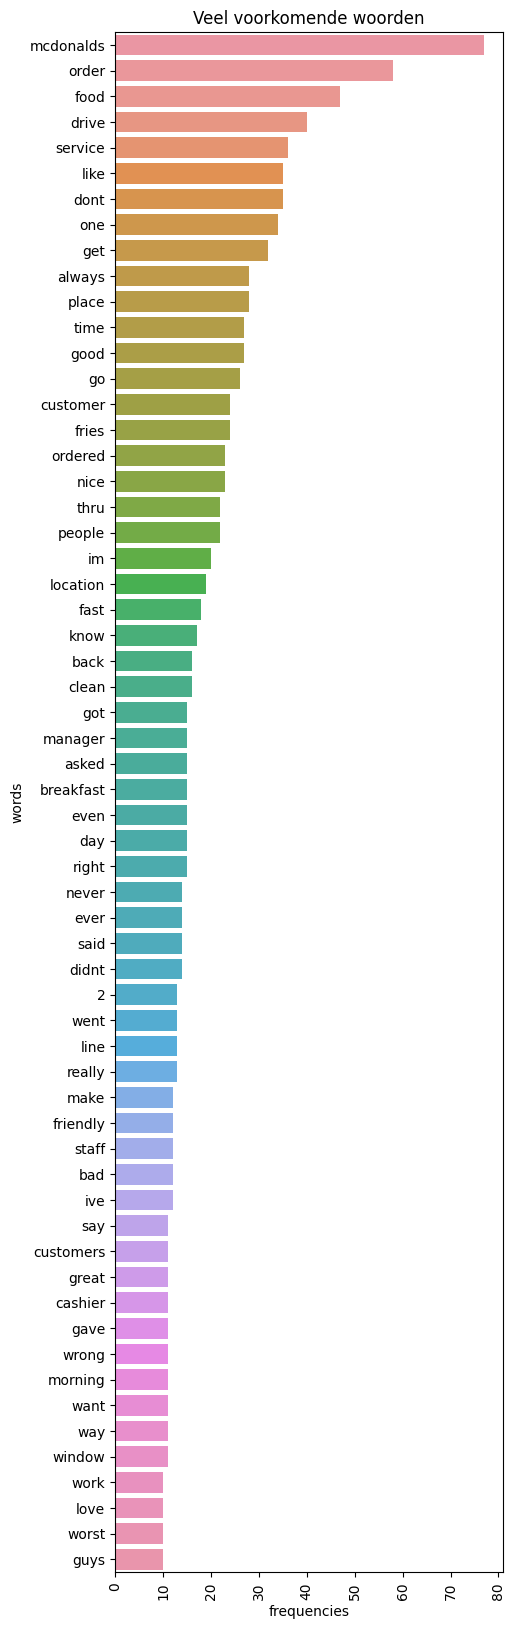

In [58]:
# Plot
plt.figure(figsize=(5,20))
plt.title('Veel voorkomende woorden')
sns.barplot(
    data=freq,
    x='frequencies',
    y='words')
plt.xticks(rotation=90)
plt.show()

## Stripping Out: Veel Voorkomende Woorden

In [59]:
# Andere stopwoorden
other_stopwords = ['one', 'get', 'go', 'im', '2', 'ive', 'thru', 'tell', 'says', 'two']

In [60]:
# Andere stopwoorden eruit
df['review_no_other'] = df['review_nostop'].apply(lambda x: " ".join(x for x in x.split() if x not in other_stopwords))

In [61]:
# Check
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop,review_no_other
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...,average mcdonalds nothing particularly special...,average mcdonalds nothing particularly special...
1,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...,nice floor sitting area clean store food ok ni...,nice floor sitting area clean store food ok ni...
2,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...,ordered fast food burger place left burgers nu...,ordered fast food burger place left burgers nu...
3,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...,clean organized like made feel comfortable sta...,clean organized like made feel comfortable sta...
4,"Lastima que no hay estrella cero , los emplead...",84,412,11,"lastima que no hay estrella cero , los emplead...",lastima que no hay estrella cero los empleado...,lastima que hay estrella cero los empleados de...,lastima que hay estrella cero los empleados de...


In [62]:
# Check twee
# aanmaken van frequentie df
freq2 = pd.Series(" ".join(df['review_no_other']).split()).value_counts().reset_index()[:60]

In [63]:
freq2

,index,0
0,mcdonalds,77
1,order,58
2,food,47
3,drive,40
4,service,36
5,like,35
6,dont,35
7,always,28
8,place,28
9,good,27


# 4. Lemmatize de Reviews

In [64]:
# installeren
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 5.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
# importeren
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\stefa\AppData\Roaming\nltk_data...


True

In [66]:
# lemmatize de dataset
df['cleaned_review'] = df['review_no_other'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

In [70]:
# check
print(df['review'][0])
print("------------")
print(df['cleaned_review'][0])

Just an average McDonald's Nothing particularly special. Love a late night burger though
------------
average mcdonalds nothing particularly special love late night burger though


# 5. Sentiment Analysis

In [71]:
# importeren
from textblob import TextBlob

In [72]:
# sentiment analysere van textblob gebruiken voor polarity en subjectivity
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[1])

In [75]:
# Check
df[['review', 'polarity', 'subjectivity']]

,review,polarity,subjectivity
0,Just an average McDonald's Nothing particularl...,0.101786,0.542857
1,"Nice floor and sitting area, clean store, food...",0.511111,0.700000
2,Ordered from a fast food burger place that lef...,0.100000,0.300000
3,Very clean and organized. I like it made me fe...,0.357407,0.492593
4,"Lastima que no hay estrella cero , los emplead...",0.000000,0.000000
...,...,...,...
120,this place is doesnt cater to the needs of the...,0.000000,0.000000
121,This is just another McDonalds. The service is...,0.160000,0.493333
122,"The food is horrible, over salted fries, stale...",-0.500000,0.500000
123,24 hours in a day !! mac always helps me when ...,0.580000,0.500000


- Polarity gaat van -1 (negatief) tot 1 (positief)
- Subjectivity gaat van 0 (objectief) tot 1 (subjectief)

In [79]:
df['polarity'].min()

-1.0

In [80]:
df[df['polarity']==-1.0].iloc[0]['review']

"this mc donald's has the most slowest people . they see a problem and don't fix it and blame a customer . worst customer service ever . for the quality of the food the prices are not work it for this service do not come here"